In the name of God


---

# Engineering Probability and Statistics
Sharif University of Technology - Department of Computer Engineering
Fall 1403

---
## Practical Assignment - Phase 1


__Course Instructor__: Dr. Abolfazl  Motahari

__Notebook Authors__: Seyed Mohammad Hossein Hosseini & Sina Mohammadi

Name: Masih Sheikhi                 
Student-ID: 402100859  

## Objective

In this assignment, you will learn the basics of the R programming language by working with the *Autistic Spectrum Disorder Screening Data for Adult* dataset. The goal is to explore, analyze, and gain insights from the dataset while applying statistical concepts.

## Dataset Overview
The *Autistic Spectrum Disorder Screening Data for Adult* dataset contains information about participants' responses to screening questions, demographic details, and whether they are classified as having Autism Spectrum Disorder (ASD).

Key Variables:

*   **A1_Score to A10_Score**: Responses to screening questions (0 = No, 1 = Yes).
*   **age**: Participant's age.
*   **gender**: Participant's gender.
*   **ethnicity**: Ethnic background.
*   **jundice**: History of jaundice as a baby (Yes/No).
*   **austim**: Family history of autism (Yes/No).
*   **result**: Screening score.
*   **Class/ASD**: Diagnosis result (Yes/No).

## Loading the dataset

1.   Import the required libraries in R.
2.   Load the Autism-Adult-Data.arff file using an appropriate library.
3. Display the first few rows to understand the structure of the dataset.

In [ ]:
install.packages("foreign")
install.packages("reshape2")
install.packages("psych")
library(psych)
library(reshape2)
library(foreign)
library(ggplot2)

url <- "https://drive.google.com/uc?id=1ZEcLOrwMWKflMhXjG-m2sQsLVIKSxtwb"
output_file <- "dataset.arff"
download.file(url, destfile = output_file, mode = "wb")
data <- read.arff(output_file)

head(data)

str(data)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,⋯,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>
1,1,1,1,1,0,0,1,1,0,0,⋯,f,White-European,no,no,United States,no,6,18 and more,Self,NO
2,1,1,0,1,0,0,0,1,0,1,⋯,m,Latino,no,yes,Brazil,no,5,18 and more,Self,NO
3,1,1,0,1,1,0,1,1,1,1,⋯,m,Latino,yes,yes,Spain,no,8,18 and more,Parent,YES
4,1,1,0,1,0,0,1,1,0,1,⋯,f,White-European,no,yes,United States,no,6,18 and more,Self,NO
5,1,0,0,0,0,0,0,1,0,0,⋯,f,NA,no,no,Egypt,no,2,18 and more,NA,NO
6,1,1,1,1,1,0,1,1,1,1,⋯,m,Others,yes,no,United States,no,9,18 and more,Self,YES


'data.frame':	704 obs. of  21 variables:
 $ A1_Score       : Factor w/ 2 levels "0","1": 2 2 2 2 2 2 1 2 2 2 ...
 $ A2_Score       : Factor w/ 2 levels "0","1": 2 2 2 2 1 2 2 2 2 2 ...
 $ A3_Score       : Factor w/ 2 levels "0","1": 2 1 1 1 1 2 1 2 1 2 ...
 $ A4_Score       : Factor w/ 2 levels "0","1": 2 2 2 2 1 2 1 2 1 2 ...
 $ A5_Score       : Factor w/ 2 levels "0","1": 1 1 2 1 1 2 1 1 2 1 ...
 $ A6_Score       : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 2 ...
 $ A7_Score       : Factor w/ 2 levels "0","1": 2 1 2 2 1 2 1 1 1 2 ...
 $ A8_Score       : Factor w/ 2 levels "0","1": 2 2 2 2 2 2 2 1 2 2 ...
 $ A9_Score       : Factor w/ 2 levels "0","1": 1 1 2 1 1 2 1 2 2 2 ...
 $ A10_Score      : Factor w/ 2 levels "0","1": 1 2 2 2 1 2 1 1 2 1 ...
 $ age            : num  26 24 27 35 40 36 17 64 29 17 ...
 $ gender         : Factor w/ 2 levels "f","m": 1 2 2 1 1 2 1 2 2 2 ...
 $ ethnicity      : Factor w/ 11 levels "Asian","Black",..: 11 4 4 11 NA 7 2 11 11 1 ...
 $ jundice        :

## Data Cleaning
1.   Convert binary columns to numeric:

   *   Transform jundice into a binary column (1 for "yes", 0 for "no").
   *   Transform austim into a binary column (1 for "yes", 0 for "no").
   *   Transform gender into a binary column (1 for "male", 0 for "female").
   *   Transform used_app_before into a binary column (1 for "yes", 0 for "no").
   *   Transform Class/ASD into a binary column (1 for "YES", 0 for "NO").
   *   A1-A10 columns are being interpreted as categorical columns. Transport them to numeric columns.
2.   Remove records where ethnicity or relation is NA.
3.   One-hot encode the ethnicity column:

   *   Create a new column for each unique value in the ethnicity field (e.g., ethnicity_White-European, ethnicity_Latino, etc.).
   *   Each row should have 1 under its respective ethnicity column and 0 elsewhere.
      *   Do the same thing for the relation column

4.   Handle missing values in the age column:

   *   remove records with missing ages

5.   Check for duplicate rows and remove them if necessary.
6.   At the end, display the column names. If they are numeric, show this and if they are categorical, print the categories.

In [ ]:
data$jundice <- ifelse(data$jundice == "yes", 1, 0)
data$austim <- ifelse(data$austim == "yes", 1, 0)
data$gender <- ifelse(data$gender == "m", 1, 0)
data$used_app_before <- ifelse(data$used_app_before == "yes", 1, 0)
data$`Class/ASD` <- ifelse(data$`Class/ASD` == "YES", 1, 0)

A_columns <- paste0("A", 1:10, "_Score")
data[A_columns] <- lapply(data[A_columns], as.numeric)

data <- data[!is.na(data$ethnicity) & !is.na(data$relation), ]

data <- cbind(data, model.matrix(~ ethnicity - 1, data = data))
data <- cbind(data, model.matrix(~ relation - 1, data = data))
data$ethnicity <- NULL
data$relation <- NULL

data <- data[!is.na(data$age), ]

data <- data[!is.na(data$age), ]

data <- data[!duplicated(data), ]

column_info <- sapply(data, class)
print(column_info)

numeric_columns <- names(column_info[column_info == "numeric"])
categorical_columns <- names(column_info[column_info != "numeric"])
print("Numeric Columns:")
print(numeric_columns)
print("Categorical Columns:")
print(categorical_columns)

                        A1_Score                         A2_Score 
                       "numeric"                        "numeric" 
                        A3_Score                         A4_Score 
                       "numeric"                        "numeric" 
                        A5_Score                         A6_Score 
                       "numeric"                        "numeric" 
                        A7_Score                         A8_Score 
                       "numeric"                        "numeric" 
                        A9_Score                        A10_Score 
                       "numeric"                        "numeric" 
                             age                           gender 
                       "numeric"                        "numeric" 
                         jundice                           austim 
                       "numeric"                        "numeric" 
                   contry_of_res                  used_app_bef

## Compute Correlations!

A good approach to gain more insight into the effect of variables on our outcome (having autism or not) is to examine the relationship between the outcome and all the variables. To do this, we compute the correlation between the outcome (target variable) and each variable to assess the importance of each element, and then we sort them to determine their priority, and then we plot them as a bar plot.

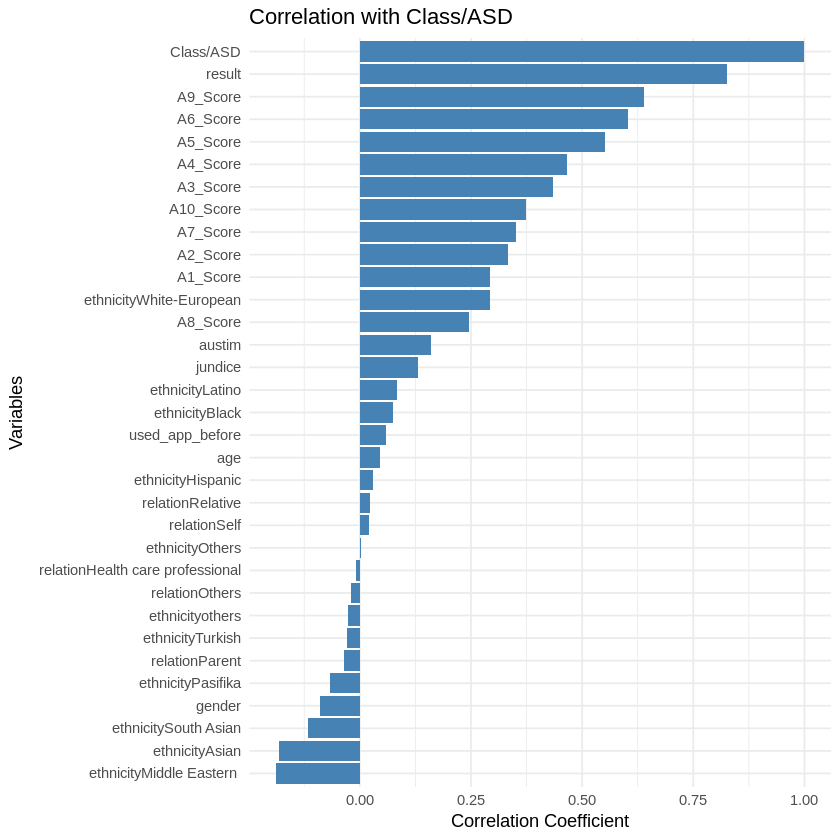

In [ ]:
numeric_data <- data[sapply(data, is.numeric)]
numeric_data <- numeric_data[, sapply(numeric_data, function(x) var(x, na.rm = TRUE) > 0)]

correlation_matrix <- cor(numeric_data, use = "complete.obs")
correlations_with_target <- correlation_matrix[,"Class/ASD"]
correlation_df <- data.frame(Variable = names(correlations_with_target),
                              Correlation = correlations_with_target)
correlation_df <- correlation_df[order(abs(correlation_df$Correlation), decreasing = TRUE), ]

ggplot(correlation_df, aes(x = reorder(Variable, Correlation), y = Correlation)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  coord_flip() +
  labs(title = "Correlation with Class/ASD", x = "Variables", y = "Correlation Coefficient") +
  theme_minimal()

Display a heatmap plot for the correlation matrix between each pair of numeric columns. Examine the heatmap and focus on correlations involving the target variable (Class/ASD). Which features show strong positive or negative correlations with the target variable? What do these correlations imply in the context of the dataset? Discuss whether any pairs of features show high correlation with each other. What does a high or low correlation mean? Answer these questions at the end of the notebook.

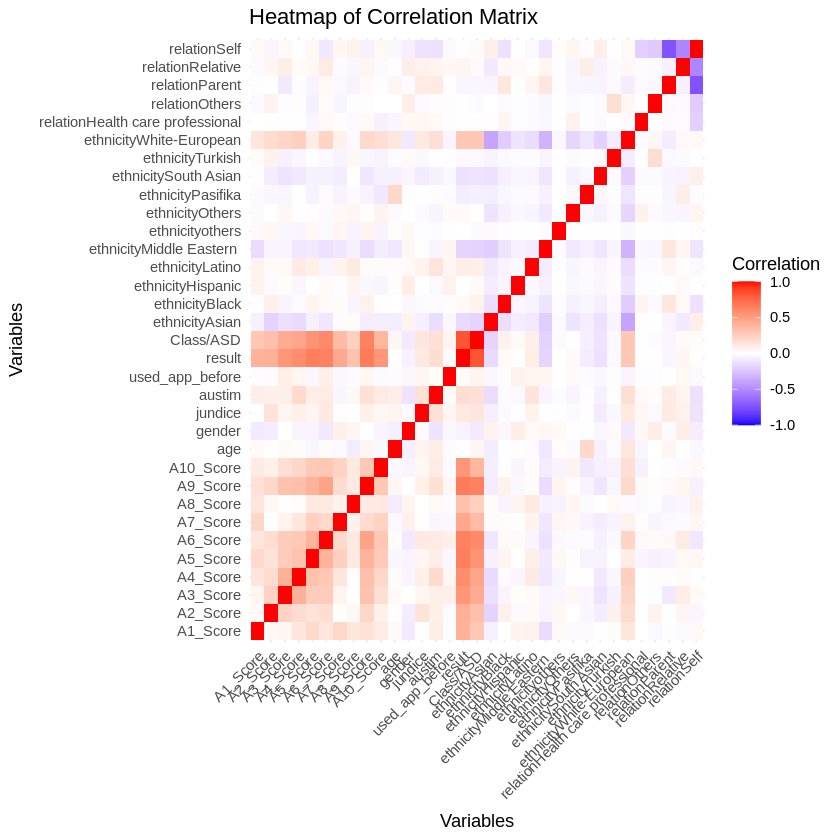

In [ ]:
numeric_data <- data[sapply(data, is.numeric)]
numeric_data <- numeric_data[, sapply(numeric_data, function(x) var(x, na.rm = TRUE) > 0)]
correlation_matrix <- cor(numeric_data, use = "complete.obs")
correlation_melted <- melt(correlation_matrix)

ggplot(correlation_melted, aes(Var1, Var2, fill = value)) +
  geom_tile() +
  scale_fill_gradient2(low = "blue", high = "red", mid = "white",
                       midpoint = 0, limit = c(-1, 1),
                       name="Correlation") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  labs(title = "Heatmap of Correlation Matrix", x = "Variables", y = "Variables")

## Describe our data by its statistics

at the first we should to get some information from our data, by using describe it

In [ ]:
summary(data)

#describe(data)

    A1_Score        A2_Score        A3_Score        A4_Score    
 Min.   :1.000   Min.   :1.000   Min.   :1.000   Min.   :1.000  
 1st Qu.:1.000   1st Qu.:1.000   1st Qu.:1.000   1st Qu.:1.000  
 Median :2.000   Median :1.000   Median :1.000   Median :2.000  
 Mean   :1.738   Mean   :1.467   Mean   :1.478   Mean   :1.522  
 3rd Qu.:2.000   3rd Qu.:2.000   3rd Qu.:2.000   3rd Qu.:2.000  
 Max.   :2.000   Max.   :2.000   Max.   :2.000   Max.   :2.000  
                                                                
    A5_Score        A6_Score        A7_Score        A8_Score    
 Min.   :1.000   Min.   :1.000   Min.   :1.000   Min.   :1.000  
 1st Qu.:1.000   1st Qu.:1.000   1st Qu.:1.000   1st Qu.:1.000  
 Median :2.000   Median :1.000   Median :1.000   Median :2.000  
 Mean   :1.523   Mean   :1.306   Mean   :1.427   Mean   :1.662  
 3rd Qu.:2.000   3rd Qu.:2.000   3rd Qu.:2.000   3rd Qu.:2.000  
 Max.   :2.000   Max.   :2.000   Max.   :2.000   Max.   :2.000  
                         

### Now please compute the average of all columns in our dataset to gain more insight about it.

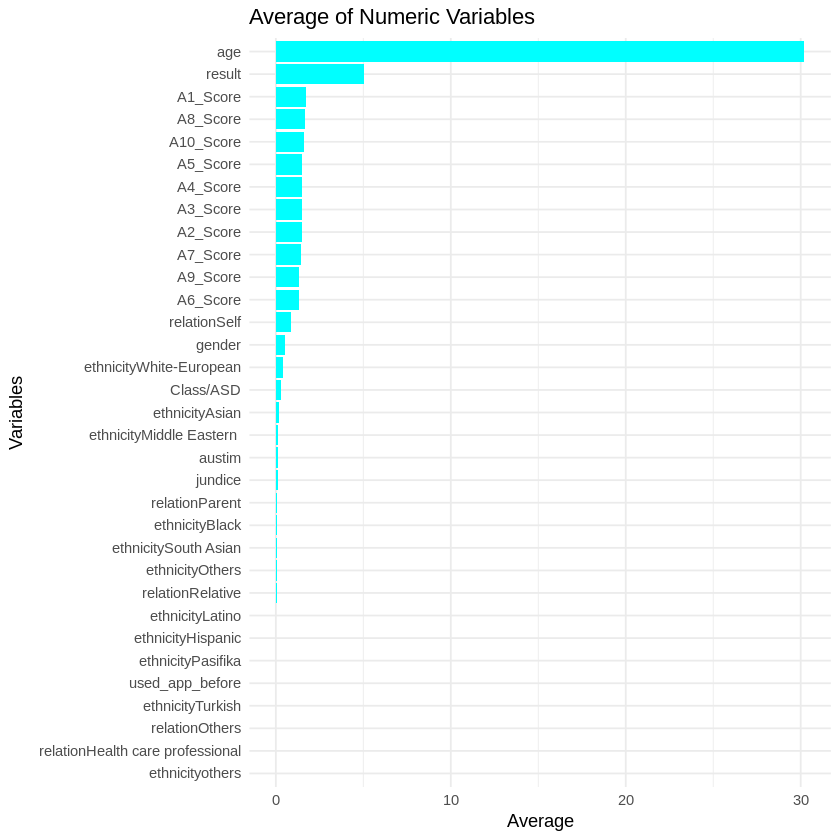

In [ ]:
averages <- colMeans(data[sapply(data, is.numeric)], na.rm = TRUE)
average_df <- data.frame(Variable = names(averages), Average = averages)

ggplot(average_df, aes(x = reorder(Variable, Average), y = Average)) +
  geom_bar(stat = "identity", fill = "cyan") +
  coord_flip() +
  labs(title = "Average of Numeric Variables", x = "Variables", y = "Average") +
  theme_minimal()

## Questions

# 1- Please explain the advantages and disadvantages of one-hot encoding for categorical data, and also introduce another way to handle categorical features in our dataset

One-Hot encoding has advantages such as model consistency. Most machine learning models (such as linear regression, decision trees, etc.) require numeric input. One-Hot encoding converts categorical data into a numeric format that can be used directly by these models.
On the other hand, one-hot encoding does not consider any ordering of the categories (such as assigning numerical values ​​1, 2, 3 to the categories). Dummy variables (columns) are easy to understand and interpret and specify which category each example belongs to.

The disadvantages of one-hot encoding include high dimensionality. If the categorical feature has many unique values ​​(high cardinality), one-hot encoding can create a large number of new columns. This can lead to increased memory usage and model complexity. Also, one-hot encoding does not capture any ordinal relationships (e.g. small, medium, large). A model can treat "small" and "large" as equally distant, which may not be desirable in some cases.

Label encoding is another way to handle categorical features that involves assigning each unique category a numerical value (e.g., "red" -> 1, "blue" -> 2, "green" -> 3). Unlike one-hot encoding, label encoding uses only one column instead of multiple columns, reducing dimensionality. If the categories have an inherent order (e.g., small, medium, large), label encoding can capture this ordinal relationship, which is useful for models that can use this information (such as decision trees). However, label encoding may introduce an unintended ordinal relationship where none exists. For example, assigning numerical values ​​to colors may imply some sort of order (red < blue < green), which does not make sense for nominal categories. It can also be difficult for some models to interpret the resulting numbers, as they may consider “bigger numbers” to be more important or closer together, even when there is no real numerical relationship.

# 2- Answer the question from the correlation compution section.

**Examine the heatmap and focus on correlations involving the target variable (Class/ASD). Which features show strong positive or negative correlations with the target variable?**

Scores A1 to A10 have a strong positive correlation, with the result variable being the strongest. The only negative correlations observed are for Asian, South Asian, and Middle Eastern ethnicities.

**What do these correlations imply in the context of the dataset?**

Strong correlation between variables indicates that the variables are more dependent on each other. This is shown in the points with warmer colors and has a correlation close to 1 or -1. This indicates that there is a strong linear relationship with a good approximation between the variables and therefore it can be said that the result and scores of A_5, 6, and 9 can well predict the class/ASD.
In contrast, the white areas that have lower correlation and close to zero indicate the independence of the values ​​and the absence of a linear relationship between them.

**Discuss whether any pairs of features show high correlation with each other.**

Each feature shows perfect correlation with itself. However, in the correlation of pairs of features, it can be seen in the heatmap that there are clusters with warm colors in the areas of scores A1 to A10, indicating similarity between the features and possibly showing similar structures.

**What does a high or low correlation mean?**

A high correlation (close to 1 or -1) indicates that two features move together consistently. For example, A1_Score and A2_Score have a high positive correlation, so high values ​​of one are associated with high values ​​of the other. A low correlation (close to 0) indicates little or no linear relationship between the two features.
